# **Minor Project 5**

**Our Scope for the project is to find similarities and disimilarities between images and also use PCA to find their latent representation.**

For this purpose, we will be using a State-of-the-art(SOTA) pretrained model known as VGG16.
So basically we are doing a transfer learning that allows us to use this pre-existing model, trained on a huge dataset for our own classification task.

Let us understand **VGG16 CNN model Architecture** 


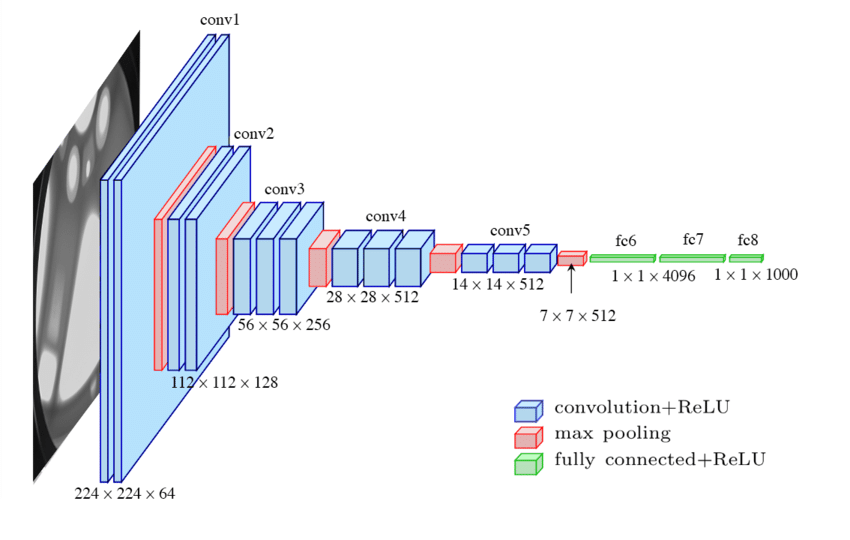


*   Input to 1st convolution layer is a fixed size 224*224 RGB image
*   The stack of convolution layers uses 3*3 kernel size filters.
*   Pooling done by live max-pooling layers
*   Then a stack of three fully connected(FC) layers
*   The Final FC layer is a Softmax layer which perform 1000 labels classification





**1. Import Necessary Libraries**

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import load_model, Model
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

**2. Define the dataset**



The dataset we are taking for this project is the flowers dataset. We have five classes of flowers namely **daisy, dandelion, rose sunflower and tulip**. These are labeled as the name of the folder and are kept in train and test folder in the ration of 70:30.

Dataset was taken from kaggle https://www.kaggle.com/alxmamaev/flowers-recognition

Lets provide the path to our dataset first. 

In [ ]:
train_set_path = "../dataset/flowers/train"
test_set_path = "../dataset/flowers/test"

"""For Google colab"""
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We now create an instance for the ImageDataGenerator class which lets us expand the size of your dataset to come up with new transformed images from our dataset. 

In [ ]:
train_datagenerator = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
)
validation_datagenerator = ImageDataGenerator(
    rescale = 1/255
)

These instances that we created will now be used to create a training_set and a validation_set that will be used to fit the model. These are also known as **iterators**.

Furthermore, Let's also define:
- **batch_size:** The batch size is a hyperparameter that specifies how many samples(images) must be processed before the *internal model parameters* are updated. A batch can be thought of as a for-loop that iterates across one or more samples and makes predictions. It helps in error calculation.

- **target_size:** A common size for all the images in the dataset. For VGG16, it's always (224, 224)

We will need these in future.

In [ ]:
batch_size = 32
target_size = (224, 224)

In [ ]:
# training_set = train_datagenerator.flow_from_directory(train_set_path, batch_size=batch_size, target_size=target_size)
# validation_set = validation_datagenerator.flow_from_directory(test_set_path, batch_size=batch_size, target_size=target_size)

"""For Google Colab"""
training_set = train_datagenerator.flow_from_directory('/content/drive/MyDrive/dataset/flowers/train', batch_size=64, target_size=(224,224))
validation_set = validation_datagenerator.flow_from_directory('/content/drive/MyDrive/dataset/flowers/test', batch_size=64, target_size=(224,224))

Found 3117 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


We are done with this section.

**3. Define the Model** 

Initially we define the VGG16 model.

In [ ]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))

**include_top=False**, will discard all the dense layers from out model. In VGG16, Dense layers are made to classify 1000 different lables but in our dataset we only have 5 different labels.

**input_shape=(224, 224, 3)**, because the size of the images in the dataset must be same as the size that the 1st convolution layer accepts.

We should go to each layers of the above model and specify that we dont need any new training. We will use all the pre-set parameters of the VGG16 which was trained in default with ImageNet dataset. 

In [ ]:
for model_layer in model.layers:
  model_layer.trainable = False

Since we discarded the dense layer through include_top=False. We should do some extra work to create our own dense layer with 5 neurons as output. These tasks are:

1. Flattern the output(the layer before dense layer) of the model.
2. Create a Fully connected(FC) layer with 512 hidden units and ReLU activation.
3. Create a final output layer as Fully connected(FC) layer with 5 neurons and softmax activation.


In [ ]:
flatten_layer = layers.Flatten()(model.output)
flattened_fc_layer = layers.Dense(512, activation='relu')(flatten_layer)
flattened_fc_softmax_layer = layers.Dense(5, activation='softmax')(flattened_fc_layer)

All the required things are ready. Now we need to define the model again since we have readjusted some layers.

In [ ]:
model = Model(inputs=model.inputs, outputs=flattened_fc_softmax_layer)

We are done here. We have defined the Model as well.

**4. Train the model** 

Now, We compile and fit the model.


In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
49/49 [==============================] - 109s 2s/step - loss: 2.6892 - accuracy: 0.5605 - val_loss: 0.6819 - val_accuracy: 0.7542
Epoch 2/10
49/49 [==============================] - 64s 1s/step - loss: 0.6233 - accuracy: 0.7780 - val_loss: 0.6189 - val_accuracy: 0.7692
Epoch 3/10
49/49 [==============================] - 64s 1s/step - loss: 0.5553 - accuracy: 0.8069 - val_loss: 0.6832 - val_accuracy: 0.7600
Epoch 4/10
49/49 [==============================] - 64s 1s/step - loss: 0.5412 - accuracy: 0.8059 - val_loss: 0.5805 - val_accuracy: 0.7792
Epoch 5/10
49/49 [==============================] - 63s 1s/step - loss: 0.4900 - accuracy: 0.8216 - val_loss: 0.5741 - val_accuracy: 0.8025
Epoch 6/10
49/49 [==============================] - 63s 1s/step - loss: 0.4506 - accuracy: 0.8357 - val_loss: 0.5918 - val_accuracy: 0.8000
Epoch 7/10
49/49 [==============================] - 63s 1s/step - loss: 0.4244 - accuracy: 0.8441 - val_loss: 0.5445 - val_accuracy: 0.8150
Epoch 8/10
49/49 [=

- **loss=categorical_crossentropy** : It gives the no of data which are classified incorrectly. Since we are doing a multi class classification, we will use categorical cross entropy.

- **metrics=accuracy**: It gives the accuracy of the model we have built.

- **optimizer=adam**: Used to reduce loss by changing the attributes of the NN.

- **epochs=4**: Epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset. One epoch means that each sample(image) in the training dataset has had an opportunity to update the internal model parameters. We have given 5 oppurtinities to the sample(image) in our model.

After we run the above cell(which will take alot of time), we can see how the **loss was minimized** and **accuracy was increased** in the ephoc. This shows how neural networks can improve when it gets to update its parameters to learn.

**5. Visualize the model** 

Let us now visually look at the loss

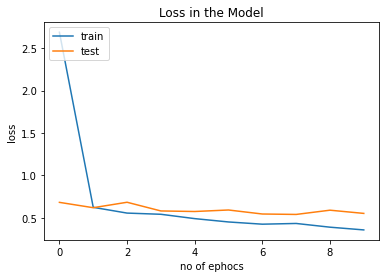

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss in the Model')
plt.ylabel('loss')
plt.xlabel('no of ephocs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**6. Save the model** 

In [ ]:
model.save('/content/drive/MyDrive/models/vgg16_flower.h5')